# Calculate error between empirical data and simulated data

In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
import pandas as pd
import pickle
import datetime
import matplotlib.pyplot as plt

## Generate table with all the activities per day and per node

In [2]:
activities = pd.read_csv('./clean_data/activities.csv')
activities['date'] = activities['date'].astype(np.datetime64)
del activities['Unnamed: 0']

In [3]:
activities.head(3)

id       date      pal  target_pal  minutes_moderate  minutes_high  \
0  409 2009-06-09  2.08591         0.0                93            40   
1  409 2009-06-10  1.69370         0.0                 0             0   
2  409 2009-06-11  1.54967         0.0                 0             0   

        status  goal_achieved initial_date  date (days)  
0  before_plan            NaN   2010-04-28         -323  
1  before_plan            NaN   2010-04-28         -322  
2  before_plan            NaN   2010-04-28         -321

In [4]:
# Get the activities that happenned during the experimental time
experiment_activities = activities[(activities['date (days)']>= 0) & (activities['date (days)'] <91)]
experiment_activities.head(3)

id       date      pal  target_pal  minutes_moderate  minutes_high  \
323  409 2010-04-28  1.71845     1.97032                89             0   
324  409 2010-04-29  2.33113     1.97032               152            75   
325  409 2010-04-30  2.14085     1.97032               185            15   

      status  goal_achieved initial_date  date (days)  
323  in_plan       0.872168   2010-04-28            0  
324  in_plan       1.183123   2010-04-28            1  
325  in_plan       1.086549   2010-04-28            2

In [5]:
# Pivot the table
empiricalActivities = experiment_activities.pivot(index='date (days)', columns='id', values='goal_achieved')
#empiricalActivities

In [6]:
experiment_activities.T

323                  324     \
id                                409                  409   
date              2010-04-28 00:00:00  2010-04-29 00:00:00   
pal                           1.71845              2.33113   
target_pal                    1.97032              1.97032   
minutes_moderate                   89                  152   
minutes_high                        0                   75   
status                        in_plan              in_plan   
goal_achieved                0.872168              1.18312   
initial_date               2010-04-28           2010-04-28   
date (days)                         0                    1   

                               325                  326     \
id                                409                  409   
date              2010-04-30 00:00:00  2010-05-01 00:00:00   
pal                           2.14085              2.15061   
target_pal                    1.97032              1.97032   
minutes_moderate                  185                  148   
minutes_high                       15                    0   
status                        in_plan              in_plan   
goal_achieved                 1.08655               1.0915   
initial_date               2010-04-28           2010-04-28   
date (days)                         2                    3   

                               327                  328     \
id                                409                  409   
date              2010-05-02 00:00:00  2010-05-03 00:00:00   
pal                           1.44385              1.95156   
target_pal                    1.97032               1.9828   
minutes_moderate                   17                  101   
minutes_high                        0                    0   
status                        in_plan              in_plan   
goal_achieved                  0.7328             0.984245   
initial_date               2010-04-28           2010-04-28   
date (days)                         4                    5   

                               329                  330     \
id                                409                  409   
date              2010-05-04 00:00:00  2010-05-05 00:00:00   
pal                           1.74077              1.70192   
target_pal                     1.9828               1.9828   
minutes_moderate                   50                   63   
minutes_high                        0                    0   
status                        in_plan              in_plan   
goal_achieved                0.877935             0.858342   
initial_date               2010-04-28           2010-04-28   
date (days)                         6                    7   

                               331                  332     \
id                                409                  409   
date              2010-05-06 00:00:00  2010-05-07 00:00:00   
pal                           1.65196              1.61877   
target_pal                     1.9828               1.9828   
minutes_moderate                   34                   32   
minutes_high                        0                    0   
status                        in_plan              in_plan   
goal_achieved                0.833145             0.816406   
initial_date               2010-04-28           2010-04-28   
date (days)                         8                    9   

                         ...                        290376  \
id                       ...                          7123   
date                     ...           2010-07-04 00:00:00   
pal                      ...                       1.73252   
target_pal               ...                       1.70377   
minutes_moderate         ...                            63   
minutes_high             ...                             0   
status                   ...                       in_plan   
goal_achieved            ...                       1.01687   
initial_date             ...                    2010-04-28

In [7]:
# List of nodes in the entire data set
listNodes = list(set(activities['id']))
len(listNodes)

2499

## Read the graphs and generate the simulated table for all the nodes

In [8]:
graphs_linear = pickle.load(open('./clean_data/graphs_linear_increasing.pickle','rb'))
len(graphs_linear)

91

In [9]:
graphs_model = pickle.load(open('./clean_data/graphs_pure_model.pickle','rb'))
len(graphs_model)

91

In [10]:
graphs_merged = pickle.load(open('./clean_data/graphs_merged.pickle','rb'))
len(graphs_model)

91

In [11]:
linearDict = {}
for t in range(91):
    graph = graphs_linear[t]
    for node in graph.nodes():
        if 'activityTimeLine' in graph.node[node]:
            linearDict[node] = graph.node[node]['activityTimeLine']    

In [12]:
modelDict = {}
for t in range(91):
    graph = graphs_model[t]
    for node in graph.nodes():
        if 'activityTimeLine' in graph.node[node]:
            modelDict[node] = graph.node[node]['activityTimeLine']  

In [13]:
mergedDict = {}
for t in range(91):
    graph = graphs_merged[t]
    for node in graph.nodes():
        if 'activityTimeLine' in graph.node[node]:
            mergedDict[node] = graph.node[node]['activityTimeLine']  

In [14]:
set(modelDict.keys()) - set(linearDict.keys())

set()

In [15]:
set(modelDict.keys()) - set(mergedDict.keys())

set()

In [16]:
set(mergedDict.keys()) - set(linearDict.keys())

set()

In [17]:
modelDF = pd.DataFrame(modelDict)
linearDF = pd.DataFrame(linearDict)
mergedDF = pd.DataFrame(mergedDict)

In [18]:
modelDF.columns.name = 'id'
linearDF.columns.name = 'id'
mergedDF.columns.name = 'id'

modelDF.index.name = 'date (days)'
linearDF.index.name = 'date (days)'
mergedDF.index.name = 'date (days)'

In [19]:
modelDF.shape

(91, 1940)

In [20]:
linearDF.shape

(91, 1940)

In [21]:
mergedDF.shape

(91, 1940)

In [22]:
np.sum(pd.isnull(modelDF).values)

81778

In [23]:
np.sum(pd.isnull(linearDF).values)

81778

In [24]:
np.sum(pd.isnull(mergedDF).values)

81778

### Checking conflicts between activities and empirical tables to calculate the difference
The simulated table with data has 1940 columns, while the empirical data table has 2474.

The idea is to make sure that the same ids from the table simulated are in the empirical table.

In [25]:
# empiricalActivities and SimulatedGoalsDF are the two tables
nodesModel =  list(set(list(modelDF.columns)))
len (nodesModel)

1940

In [26]:
nodesLinear =  list(set(list(linearDF.columns)))
len (nodesLinear)

1940

In [27]:
nodesMerged =  list(set(list(mergedDF.columns)))
len (nodesMerged)

1940

In [28]:
nodesEmpirical =  list(set(list(empiricalActivities.columns)))
len (nodesEmpirical)

2472

In [29]:
cols = list(mergedDF.columns)
cols = map(int,cols)
len(cols)

1940

In [30]:
# Selection of empirical data
selectedEmpirical = empiricalActivities.ix[:,empiricalActivities.columns.isin(cols)]
len(selectedEmpirical.columns)

1939

In [31]:
# Nodes that were not included
nodesSelectedSimulated =  list(set(list(selectedEmpirical.columns)))
set(cols) - set(nodesSelectedSimulated)

{2979}

For all 3 DF (model, linear and merged) the node 2979 was the exception.

In [32]:
# Drop the 2979 column
modelDF.drop('2979', axis=1, inplace=True)
mergedDF.drop('2979', axis=1, inplace=True)
linearDF.drop('2979', axis=1, inplace=True)

In [33]:
modelDF.columns = modelDF.columns.astype(int)
linearDF.columns = linearDF.columns.astype(int)
mergedDF.columns = mergedDF.columns.astype(int)

In [34]:
modelDF = modelDF.reindex_axis(sorted(modelDF.columns), axis=1)
linearDF = linearDF.reindex_axis(sorted(linearDF.columns), axis=1)
mergedDF = mergedDF.reindex_axis(sorted(mergedDF.columns), axis=1)

In [35]:
mergedDF.head()

id              3         7         9         79        89        109    \
date (days)                                                               
0            0.951285  1.017042  0.958529  0.988466  0.989008  0.841194   
1            0.977483  1.021097  0.964375  0.989048  1.011289  0.841777   
2            1.062772  0.985463  0.995336  0.989630  0.999155  0.842359   
3            1.071618  0.947760  1.000414  0.990212  0.998563  0.842941   
4            1.002689  0.919552  0.973749  0.990794  0.956332  0.843523   

id              139       151       197       261    ...    68757  68763  \
date (days)                                          ...                   
0            0.950074  0.958508  0.946108  1.003710  ...      NaN    NaN   
1            0.950656  0.959090  0.946690  1.004292  ...      NaN    NaN   
2            0.951238  0.959672  0.947272  1.004874  ...      NaN    NaN   
3            0.951820  0.960254  0.947854  1.005456  ...      NaN    NaN   
4            0.952402  0.960836  0.948436  1.006038  ...      NaN    NaN   

id           68817  68827  68845  68849  68869  68873  68877  68881  
date (days)                                                          
0              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
1              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
3              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
4              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  

[5 rows x 1939 columns]

In [36]:
linearDF.head()

id              3         7         9         79        89        109    \
date (days)                                                               
0            0.951285  1.017042  0.958529  0.988466  0.989008  0.841194   
1            0.951867  1.017624  0.959111  0.989048  0.989590  0.841777   
2            0.952450  1.018206  0.959693  0.989630  0.990172  0.842359   
3            0.953032  1.018788  0.960275  0.990212  0.990755  0.842941   
4            0.953614  1.019370  0.960857  0.990794  0.991337  0.843523   

id              139       151       197       261    ...    68757  68763  \
date (days)                                          ...                   
0            0.950074  0.958508  0.946108  1.003710  ...      NaN    NaN   
1            0.950656  0.959090  0.946690  1.004292  ...      NaN    NaN   
2            0.951238  0.959672  0.947272  1.004874  ...      NaN    NaN   
3            0.951820  0.960254  0.947854  1.005456  ...      NaN    NaN   
4            0.952402  0.960836  0.948436  1.006038  ...      NaN    NaN   

id           68817  68827  68845  68849  68869  68873  68877  68881  
date (days)                                                          
0              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
1              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
3              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
4              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  

[5 rows x 1939 columns]

In [37]:
###df.pivot(index=['id', 'date (days)'], values='value')
#pd.isnull(linearDF.mean(axis=0))

In [38]:
empirical_data = selectedEmpirical.reindex_axis(sorted(selectedEmpirical.columns), axis=1)

In [39]:
empirical_data.head()

id              3         7         9         79        89        109    \
date (days)                                                               
0            1.203208  1.192181  0.930984  0.994790  1.127574  0.928909   
1            1.090551  0.751980  0.994376  1.018184  1.133042  0.990605   
2            1.368851  1.079537  0.928962  0.967552  0.911602  0.990948   
3            0.648808  1.096612  1.079067  0.916548  0.875834  1.175122   
4            0.904348  1.108548  1.048549  1.056979  0.760025  0.983047   

id              139       151       197       261    ...    68757  68763  \
date (days)                                          ...                   
0                 NaN  0.986278  0.948130  0.903792  ...      NaN    NaN   
1                 NaN  1.001616  0.860333  1.250526  ...      NaN    NaN   
2            0.618836  0.982734  0.942178  1.051717  ...      NaN    NaN   
3            1.129907  1.166013  1.101099  0.951532  ...      NaN    NaN   
4            0.766694  0.915340  0.928185  0.973382  ...      NaN    NaN   

id           68817  68827  68845  68849  68869  68873  68877  68881  
date (days)                                                          
0              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
1              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
3              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
4              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  

[5 rows x 1939 columns]

## Flattening the matrices

In [40]:
modelArray = np.array(modelDF)
linearArray = np.array(linearDF)
mergedArray = np.array(mergedDF)

In [41]:
modelFlat = modelArray.flatten()
linearFlat = linearArray.flatten()
mergedFlat = mergedArray.flatten()

In [42]:
print len(modelFlat), len(linearFlat), len(mergedFlat)

176449 176449 176449


In [43]:
empirical_flat = np.array(empirical_data)

In [44]:
empirical_flat = empirical_flat.flatten()

In [45]:
len(empirical_flat)

176449

In [46]:
df = pd.DataFrame(empirical_flat, columns=['Empirical'])
df['Model'] = modelFlat
df['Linear'] = linearFlat
df['Merged'] = mergedFlat

In [47]:
df.tail(100)

Empirical     Model    Linear    Merged
176349   0.796317  1.044373  1.011468  1.046711
176350   0.761394  1.015803  1.028610  1.028610
176351   0.980107  0.757971  0.982092  0.764951
176352   1.015243  1.041089  0.977387  1.043413
176353   0.994705  0.944121  0.913117  0.946449
176354   1.019297  0.869171  0.817882  0.869753
176355   0.967941  0.886228  0.958564  0.891450
176356   1.018179  0.954590  0.967396  0.967396
176357   1.151397  1.046834  1.059640  1.059640
176358   0.975179  0.918988  0.990666  0.921385
176359        NaN  0.924322  0.843831  0.926417
176360   0.988812  0.976992  0.988249  0.979320
176361        NaN  0.901932  0.907276  0.904259
176362        NaN  0.989680  0.933282  0.992004
176363   0.838906  0.965003  0.977809  0.977809
176364   0.973839  0.858890  0.871696  0.871696
176365   1.102813  1.021109  1.020427  1.023407
176366        NaN  0.972466  1.021590  0.974790
176367   0.950862  0.993236  0.991865  0.995533
176368   1.074284  0.876819  0.956151  0.879143
176369   0.993721  0.968722  1.017929  0.971046
176370   0.751599  1.147709  0.988410  1.150007
176371   1.032167  0.894252  0.910987  0.896826
176372   0.965299  0.997555  1.004847  1.000058
176373   1.073532  0.982739  0.964928  0.985722
176374        NaN  0.974609  0.804254  0.977478
176375   1.031142  0.916598  0.987191  0.918922
176376   1.142779  0.968713  1.127982  0.970528
176377   0.975665  0.979872  0.893799  0.982200
176378   1.122427  1.003026  0.974849  1.005351
...           ...       ...       ...       ...
176419   0.959659  0.974028  0.971860  0.974610
176420   0.938867  0.959180  0.963836  0.963836
176421   1.005947  1.087915  1.014727  1.090011
176422   0.871727  1.035937  0.979207  1.038032
176423   1.031638  0.972428  0.986257  0.974523
176424   0.989762  1.007969  1.008551  1.008551
176425   1.159249  0.972497  0.973079  0.973079
176426   1.048849  0.955231  0.959888  0.959888
176427   1.036516  0.995925  0.962241  0.998021
176428        NaN  0.881891  0.886547  0.886547
176429   0.963850  0.959553  0.970687  0.961674
176430   1.004098  0.954896  0.952493  0.955478
176431   0.991768  0.932653  0.976216  0.934981
176432        NaN  0.918368  0.904490  0.920463
176433   0.987229  0.942955  0.948981  0.943537
176434   0.949154  0.946441  0.971985  0.947023
176435   0.807236  0.963022  0.972372  0.965117
176436   1.290307  0.976185  0.972006  0.978785
176437   0.729788  1.003909  1.000578  1.006005
176438   0.985348  0.898084  0.974275  0.900179
176439   1.042272  0.794085  0.798742  0.798742
176440   0.988138  1.009828  0.939689  1.012018
176441   1.058862  0.873687  0.874270  0.874270
176442   1.137075  0.884104  0.884686  0.884686
176443   0.991734  1.041187  1.041769  1.041769
176444   0.939171  0.997616  0.986857  0.998198
176445   0.867544  0.950009  0.953129  0.950591
176446   1.161284  0.949694  0.950276  0.950276
176447   1.333084  0.972179  1.008552  0.972761
176448   1.111514  0.943094  0.943677  0.943677

[100 rows x 4 columns]

In [48]:
len(df)

176449

In [49]:
df = df.dropna()

In [50]:
len(df)

80755

In [51]:
df.shape

(80755, 4)

In [52]:
df['Diff_Model'] = df['Model'] - df['Empirical']
df['Diff_Linear'] = df['Linear'] - df['Empirical']
df['Diff_Merged'] = df['Merged'] - df['Empirical']

In [53]:
df.head()

Empirical     Model    Linear    Merged  Diff_Model  Diff_Linear  \
0   1.203208  0.951285  0.951285  0.951285   -0.251922    -0.251922   
1   1.192181  1.017042  1.017042  1.017042   -0.175139    -0.175139   
2   0.930984  0.958529  0.958529  0.958529    0.027544     0.027544   
3   0.994790  0.988466  0.988466  0.988466   -0.006324    -0.006324   
4   1.127574  0.989008  0.989008  0.989008   -0.138565    -0.138565   

   Diff_Merged  
0    -0.251922  
1    -0.175139  
2     0.027544  
3    -0.006324  
4    -0.138565

In [54]:
df.ix[100]

Empirical      0.807843
Model          0.950873
Linear         0.950873
Merged         0.950873
Diff_Model     0.143030
Diff_Linear    0.143030
Diff_Merged    0.143030
Name: 100, dtype: float64

In [55]:
df['Squared_Diff_Model'] = df['Diff_Model']*df['Diff_Model']
df['Squared_Diff_Linear'] = df['Diff_Linear']*df['Diff_Linear']
df['Squared_Diff_Merged'] = df['Diff_Merged']*df['Diff_Merged']

In [56]:
df.head()

Empirical     Model    Linear    Merged  Diff_Model  Diff_Linear  \
0   1.203208  0.951285  0.951285  0.951285   -0.251922    -0.251922   
1   1.192181  1.017042  1.017042  1.017042   -0.175139    -0.175139   
2   0.930984  0.958529  0.958529  0.958529    0.027544     0.027544   
3   0.994790  0.988466  0.988466  0.988466   -0.006324    -0.006324   
4   1.127574  0.989008  0.989008  0.989008   -0.138565    -0.138565   

   Diff_Merged  Squared_Diff_Model  Squared_Diff_Linear  Squared_Diff_Merged  
0    -0.251922            0.063465             0.063465             0.063465  
1    -0.175139            0.030674             0.030674             0.030674  
2     0.027544            0.000759             0.000759             0.000759  
3    -0.006324            0.000040             0.000040             0.000040  
4    -0.138565            0.019200             0.019200             0.019200

In [57]:
df['Abs_Model'] = np.abs(df['Diff_Model'])
df['Abs_Linear'] = np.abs(df['Diff_Linear'])
df['Abs_Merged'] = np.abs(df['Diff_Merged'])

In [58]:
df.tail(20)

Empirical     Model    Linear    Merged  Diff_Model  Diff_Linear  \
176427   1.036516  0.995925  0.962241  0.998021   -0.040590    -0.074275   
176429   0.963850  0.959553  0.970687  0.961674   -0.004297     0.006837   
176430   1.004098  0.954896  0.952493  0.955478   -0.049202    -0.051605   
176431   0.991768  0.932653  0.976216  0.934981   -0.059115    -0.015552   
176433   0.987229  0.942955  0.948981  0.943537   -0.044273    -0.038248   
176434   0.949154  0.946441  0.971985  0.947023   -0.002713     0.022831   
176435   0.807236  0.963022  0.972372  0.965117    0.155786     0.165136   
176436   1.290307  0.976185  0.972006  0.978785   -0.314121    -0.318301   
176437   0.729788  1.003909  1.000578  1.006005    0.274122     0.270790   
176438   0.985348  0.898084  0.974275  0.900179   -0.087264    -0.011072   
176439   1.042272  0.794085  0.798742  0.798742   -0.248187    -0.243530   
176440   0.988138  1.009828  0.939689  1.012018    0.021689    -0.048449   
176441   1.058862  0.873687  0.874270  0.874270   -0.185175    -0.184593   
176442   1.137075  0.884104  0.884686  0.884686   -0.252971    -0.252389   
176443   0.991734  1.041187  1.041769  1.041769    0.049453     0.050035   
176444   0.939171  0.997616  0.986857  0.998198    0.058445     0.047687   
176445   0.867544  0.950009  0.953129  0.950591    0.082465     0.085585   
176446   1.161284  0.949694  0.950276  0.950276   -0.211590    -0.211008   
176447   1.333084  0.972179  1.008552  0.972761   -0.360905    -0.324532   
176448   1.111514  0.943094  0.943677  0.943677   -0.168419    -0.167837   

        Diff_Merged  Squared_Diff_Model  Squared_Diff_Linear  \
176427    -0.038495            0.001648             0.005517   
176429    -0.002175            0.000018             0.000047   
176430    -0.048620            0.002421             0.002663   
176431    -0.056787            0.003495             0.000242   
176433    -0.043691            0.001960             0.001463   
176434    -0.002131            0.000007             0.000521   
176435     0.157881            0.024269             0.027270   
176436    -0.311521            0.098672             0.101316   
176437     0.276217            0.075143             0.073327   
176438    -0.085169            0.007615             0.000123   
176439    -0.243530            0.061597             0.059307   
176440     0.023880            0.000470             0.002347   
176441    -0.184593            0.034290             0.034075   
176442    -0.252389            0.063994             0.063700   
176443     0.050035            0.002446             0.002503   
176444     0.059027            0.003416             0.002274   
176445     0.083047            0.006800             0.007325   
176446    -0.211008            0.044770             0.044524   
176447    -0.360323            0.130252             0.105321   
176448    -0.167837            0.028365             0.028169   

        Squared_Diff_Merged  Abs_Model  Abs_Linear  Abs_Merged  
176427             0.001482   0.040590    0.074275    0.038495  
176429             0.000005   0.004297    0.006837    0.002175  
176430             0.002364   0.049202    0.051605    0.048620  
176431             0.003225   0.059115    0.015552    0.056787  
176433             0.001909   0.044273    0.038248    0.043691  
176434             0.000005   0.002713    0.022831    0.002131  
176435             0.024927   0.155786    0.165136    0.157881  
176436             0.097046   0.314121    0.318301    0.311521  
176437             0.076296   0.274122    0.270790    0.276217  
176438             0.007254   0.087264    0.011072    0.085169  
176439             0.059307   0.248187    0.243530    0.243530  
176440             0.000570   0.021689    0.048449    0.023880  
176441             0.034075   0.185175    0.184593    0.184593  
176442             0.063700   0.252971    0.252389    0.252389  
176443             0.002503   0.049453    0.050035    0.050035  
176444             0.00348

In [59]:
# Reset index (drop is to remove a column with old indexes)
df = df.reset_index(drop=True)
df.tail(20)

Empirical     Model    Linear    Merged  Diff_Model  Diff_Linear  \
80735   1.036516  0.995925  0.962241  0.998021   -0.040590    -0.074275   
80736   0.963850  0.959553  0.970687  0.961674   -0.004297     0.006837   
80737   1.004098  0.954896  0.952493  0.955478   -0.049202    -0.051605   
80738   0.991768  0.932653  0.976216  0.934981   -0.059115    -0.015552   
80739   0.987229  0.942955  0.948981  0.943537   -0.044273    -0.038248   
80740   0.949154  0.946441  0.971985  0.947023   -0.002713     0.022831   
80741   0.807236  0.963022  0.972372  0.965117    0.155786     0.165136   
80742   1.290307  0.976185  0.972006  0.978785   -0.314121    -0.318301   
80743   0.729788  1.003909  1.000578  1.006005    0.274122     0.270790   
80744   0.985348  0.898084  0.974275  0.900179   -0.087264    -0.011072   
80745   1.042272  0.794085  0.798742  0.798742   -0.248187    -0.243530   
80746   0.988138  1.009828  0.939689  1.012018    0.021689    -0.048449   
80747   1.058862  0.873687  0.874270  0.874270   -0.185175    -0.184593   
80748   1.137075  0.884104  0.884686  0.884686   -0.252971    -0.252389   
80749   0.991734  1.041187  1.041769  1.041769    0.049453     0.050035   
80750   0.939171  0.997616  0.986857  0.998198    0.058445     0.047687   
80751   0.867544  0.950009  0.953129  0.950591    0.082465     0.085585   
80752   1.161284  0.949694  0.950276  0.950276   -0.211590    -0.211008   
80753   1.333084  0.972179  1.008552  0.972761   -0.360905    -0.324532   
80754   1.111514  0.943094  0.943677  0.943677   -0.168419    -0.167837   

       Diff_Merged  Squared_Diff_Model  Squared_Diff_Linear  \
80735    -0.038495            0.001648             0.005517   
80736    -0.002175            0.000018             0.000047   
80737    -0.048620            0.002421             0.002663   
80738    -0.056787            0.003495             0.000242   
80739    -0.043691            0.001960             0.001463   
80740    -0.002131            0.000007             0.000521   
80741     0.157881            0.024269             0.027270   
80742    -0.311521            0.098672             0.101316   
80743     0.276217            0.075143             0.073327   
80744    -0.085169            0.007615             0.000123   
80745    -0.243530            0.061597             0.059307   
80746     0.023880            0.000470             0.002347   
80747    -0.184593            0.034290             0.034075   
80748    -0.252389            0.063994             0.063700   
80749     0.050035            0.002446             0.002503   
80750     0.059027            0.003416             0.002274   
80751     0.083047            0.006800             0.007325   
80752    -0.211008            0.044770             0.044524   
80753    -0.360323            0.130252             0.105321   
80754    -0.167837            0.028365             0.028169   

       Squared_Diff_Merged  Abs_Model  Abs_Linear  Abs_Merged  
80735             0.001482   0.040590    0.074275    0.038495  
80736             0.000005   0.004297    0.006837    0.002175  
80737             0.002364   0.049202    0.051605    0.048620  
80738             0.003225   0.059115    0.015552    0.056787  
80739             0.001909   0.044273    0.038248    0.043691  
80740             0.000005   0.002713    0.022831    0.002131  
80741             0.024927   0.155786    0.165136    0.157881  
80742             0.097046   0.314121    0.318301    0.311521  
80743             0.076296   0.274122    0.270790    0.276217  
80744             0.007254   0.087264    0.011072    0.085169  
80745             0.059307   0.248187    0.243530    0.243530  
80746             0.000570   0.021689    0.048449    0.023880  
80747             0.034075   0.185175    0.184593    0.184593  
80748             0.063700   0.252971    0.252389    0.252389  
80749             0.002503   0.049453    0.050035    0.050035  
80750             0.003484   0.058445    0.047687    0.059027  
80751             0

In [60]:
df.to_csv('./clean_data/preDataDF.pd')

## Statistics for squared difference

In [61]:
print df['Squared_Diff_Model'].mean(), df['Squared_Diff_Linear'].mean(), df['Squared_Diff_Merged'].mean()

0.026136367944 0.0262126686437 0.0261029261007


In [62]:
print df['Squared_Diff_Model'].std(), df['Squared_Diff_Linear'].std(), df['Squared_Diff_Merged'].std()

0.0670315971432 0.0645399691661 0.0666358904425


In [63]:
print df['Squared_Diff_Model'].var(), df['Squared_Diff_Linear'].var(), df['Squared_Diff_Merged'].var()

0.00449323501557 0.00416540761996 0.00444034189507


In [64]:
print df['Squared_Diff_Model'].median(), df['Squared_Diff_Linear'].median(), df['Squared_Diff_Merged'].median()

0.00838508864534 0.00863304618378 0.00832570883502


In [65]:
print df['Squared_Diff_Model'].max(), df['Squared_Diff_Linear'].max(), df['Squared_Diff_Merged'].max()

5.91169787142 5.85803814788 5.85803814788


In [66]:
print df['Squared_Diff_Model'].min(), df['Squared_Diff_Linear'].min(), df['Squared_Diff_Merged'].min()

1.84467118684e-14 3.95438485666e-13 1.02064881734e-14


## Statistics for absolute difference

In [67]:
print df['Abs_Model'].mean(), df['Abs_Linear'].mean(), df['Abs_Merged'].mean()

0.120208459303 0.121002630263 0.120122054555


In [68]:
print df['Abs_Model'].std(), df['Abs_Linear'].std(), df['Abs_Merged'].std()

0.108103834209 0.107569398067 0.108045188083


In [69]:
print df['Abs_Model'].var(), df['Abs_Linear'].var(), df['Abs_Merged'].var()

0.0116864389707 0.0115711754006 0.0116737626679


In [70]:
print df['Abs_Model'].median(), df['Abs_Linear'].median(), df['Abs_Merged'].median()

0.0915701296567 0.092914187204 0.0912453222638


In [71]:
print df['Abs_Model'].max(), df['Abs_Linear'].max(), df['Abs_Merged'].max()

2.43139833664 2.42033843664 2.42033843664


In [72]:
print df['Abs_Model'].min(), df['Abs_Linear'].min(), df['Abs_Merged'].min()

1.35818672753e-07 6.28838998207e-07 1.01027165522e-07


In [73]:
import scipy.stats as stats

### Variables for the tests

In [74]:
diffModel = np.abs(modelDF - empirical_data).mean(axis=1).dropna()
diffLinear = np.abs(linearDF - empirical_data).mean(axis=1).dropna()
diffMerged = np.abs(mergedDF - empirical_data).mean(axis=1).dropna()

In [75]:
diffModel

date (days)
0     0.118164
1     0.119287
2     0.137832
3     0.153302
4     0.141221
5     0.119288
6     0.123200
7     0.124473
8     0.122876
9     0.127906
10    0.133761
11    0.145259
12    0.115581
13    0.120028
14    0.115972
15    0.120363
16    0.129038
17    0.139952
18    0.146794
19    0.110563
20    0.111290
21    0.106372
22    0.114076
23    0.126918
24    0.138392
25    0.146590
26    0.111866
27    0.107412
28    0.117650
29    0.110087
        ...   
61    0.107468
62    0.111355
63    0.108449
64    0.109790
65    0.118417
66    0.142431
67    0.141990
68    0.132152
69    0.111655
70    0.113388
71    0.115919
72    0.114647
73    0.140188
74    0.130936
75    0.114911
76    0.111238
77    0.105906
78    0.113947
79    0.119904
80    0.134357
81    0.137478
82    0.115078
83    0.111051
84    0.112148
85    0.113704
86    0.119015
87    0.137971
88    0.136672
89    0.119127
90    0.111775
dtype: float64

### Correlation 
np.corrcoef -> Return Pearson product-moment correlation coefficients.

In [76]:
np.corrcoef(df['Empirical'],df['Model'])

array([[ 1.        ,  0.13116444],
       [ 0.13116444,  1.        ]])

In [77]:
np.corrcoef(df['Empirical'],df['Linear'])

array([[ 1.        ,  0.06840061],
       [ 0.06840061,  1.        ]])

In [78]:
np.corrcoef(df['Empirical'],df['Merged'])

array([[ 1.        ,  0.13044289],
       [ 0.13044289,  1.        ]])

### Pearson 

In [79]:
stats.pearsonr(df['Empirical'],df['Model'])

(0.13116444398701552, 1.0615028824213351e-306)

In [80]:
stats.pearsonr(df['Empirical'],df['Linear'])

(0.068400613583884953, 2.3892255770994802e-84)

In [81]:
stats.pearsonr(df['Empirical'],df['Merged'])

(0.13044288937421653, 2.4886530557674896e-303)

### Spearman

In [82]:
stats.spearmanr(df['Empirical'],df['Model'])

SpearmanrResult(correlation=0.14867716672780071, pvalue=0.0)

In [83]:
stats.spearmanr(df['Empirical'],df['Linear'])

SpearmanrResult(correlation=0.041982531416204179, pvalue=7.7356937249550644e-33)

In [84]:
stats.spearmanr(df['Empirical'],df['Merged'])

SpearmanrResult(correlation=0.14623685480336554, pvalue=0.0)

### ANOVA

In [85]:
meanModel = modelDF.mean(axis=1).dropna()
meanLinear = linearDF.mean(axis=1).dropna()
meanMerged = mergedDF.mean(axis=1).dropna()

meanEmp = empirical_data.mean(axis=1).dropna()
meanEmpSelect = empirical_data[~pd.isnull(modelDF)].mean(axis=1)

In [86]:
meanEmpSelect

date (days)
0     0.988489
1     1.001229
2     0.995851
3     0.993881
4     0.948500
5     0.957259
6     0.974466
7     0.974124
8     0.980197
9     0.975486
10    0.959500
11    0.931401
12    0.974725
13    0.989892
14    0.983384
15    0.978351
16    0.993417
17    0.995780
18    0.972722
19    0.977624
20    0.975429
21    0.986677
22    1.004667
23    1.010737
24    1.004313
25    0.977715
26    0.975033
27    0.992205
28    0.993288
29    0.981140
        ...   
61    0.966439
62    0.977827
63    0.973203
64    0.978135
65    0.971590
66    0.975635
67    0.947394
68    0.920188
69    0.940045
70    0.946832
71    0.950023
72    0.956863
73    0.945837
74    0.920593
75    0.941055
76    0.945651
77    0.939529
78    0.953260
79    0.957098
80    0.945591
81    0.924762
82    0.937640
83    0.942188
84    0.946016
85    0.945361
86    0.952041
87    0.954109
88    0.924345
89    0.942810
90    0.938271
dtype: float64

In [87]:
f_value, p_value = stats.f_oneway(meanEmpSelect, meanMerged, meanLinear)

In [88]:
f_value

6.4010489370118329

In [89]:
p_value

0.0019228860223069932

In [90]:
len(diffMerged)

91

In [91]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#pairwise_tukeyhsd(??)

### Testing normality

In [92]:
stats.normaltest(meanModel)

NormaltestResult(statistic=9.6595266063477077, pvalue=0.0079884118739327274)

In [93]:
stats.normaltest(meanMerged)

NormaltestResult(statistic=9.0238465223499418, pvalue=0.010977327592618675)

In [94]:
stats.normaltest(meanLinear)

NormaltestResult(statistic=23.544481468146294, pvalue=7.7157972944510904e-06)

Not normally distributed (p < 0.01)

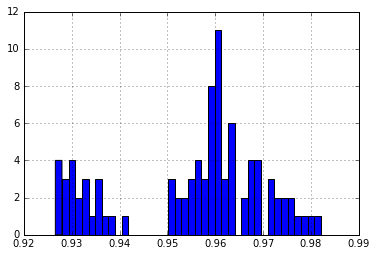

In [95]:
meanModel.hist(bins=40)

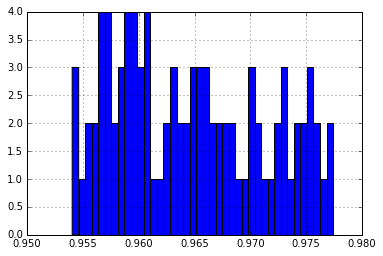

In [96]:
meanLinear.hist(bins=40)

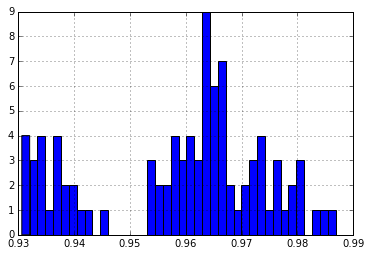

In [97]:
meanMerged.hist(bins=40)

### T test independent
 If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [98]:
#stats.ttest_ind(meanEmpSelect, meanLinear)
stats.mannwhitneyu(meanEmpSelect, meanLinear)

MannwhitneyuResult(statistic=3536.0, pvalue=0.044597975091088954)

In [99]:
stats.ks_2samp(meanEmpSelect, meanMerged)

Ks_2sampResult(statistic=0.31868131868131871, pvalue=0.00013290289977776134)

In [100]:
meanMerged.mean()

0.9590259389346796

In [101]:
meanLinear.mean()

0.9646670238612473

In [102]:
meanEmp.mean()

0.9581586776237886

In [103]:
meanEmpSelect.mean()

0.9670239670180009

In [104]:
np.nanmean(np.array(linearDF))

0.967066299508889

In [105]:
diffModelDay = np.abs(modelDF - empirical_data).mean(axis=1).dropna()
diffLinearDay = np.abs(linearDF - empirical_data).mean(axis=1).dropna()
diffMergedDay = np.abs(mergedDF - empirical_data).mean(axis=1).dropna()

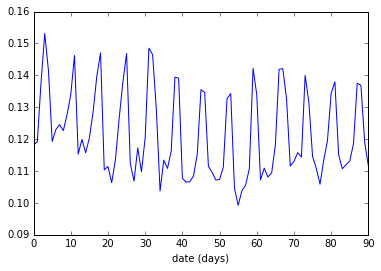

In [106]:
diffMergedDay.plot()

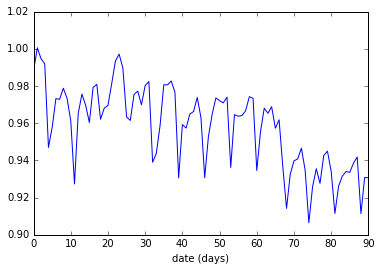

In [107]:
empirical_data.mean(axis=1).plot()

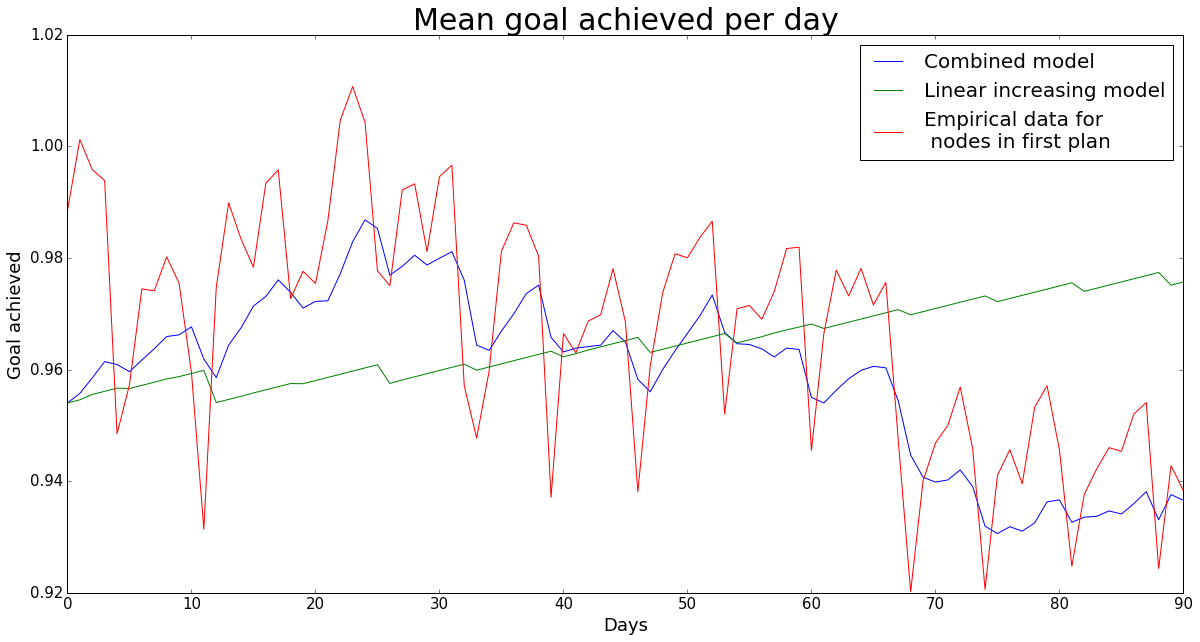

In [108]:
plt.figure(figsize=(20,10))
ax = mergedDF.mean(axis=1).plot(label='Combined model')
ax.set_title('Mean goal achieved per day', fontsize=30)
#empirical_data.mean(axis=1).plot(ax=ax, label='empirical')
linearDF.mean(axis=1).plot(ax=ax, label='Linear increasing model')
#modelDF.mean(axis=1).plot(ax=ax, label='model')
empirical_data[~pd.isnull(modelDF)].mean(axis=1).plot(ax=ax, label='Empirical data for\n nodes in first plan')
ax.set_xlabel('Days', fontsize=18)
ax.set_ylabel('Goal achieved', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
plt.savefig('./imgs/mean_models.png')

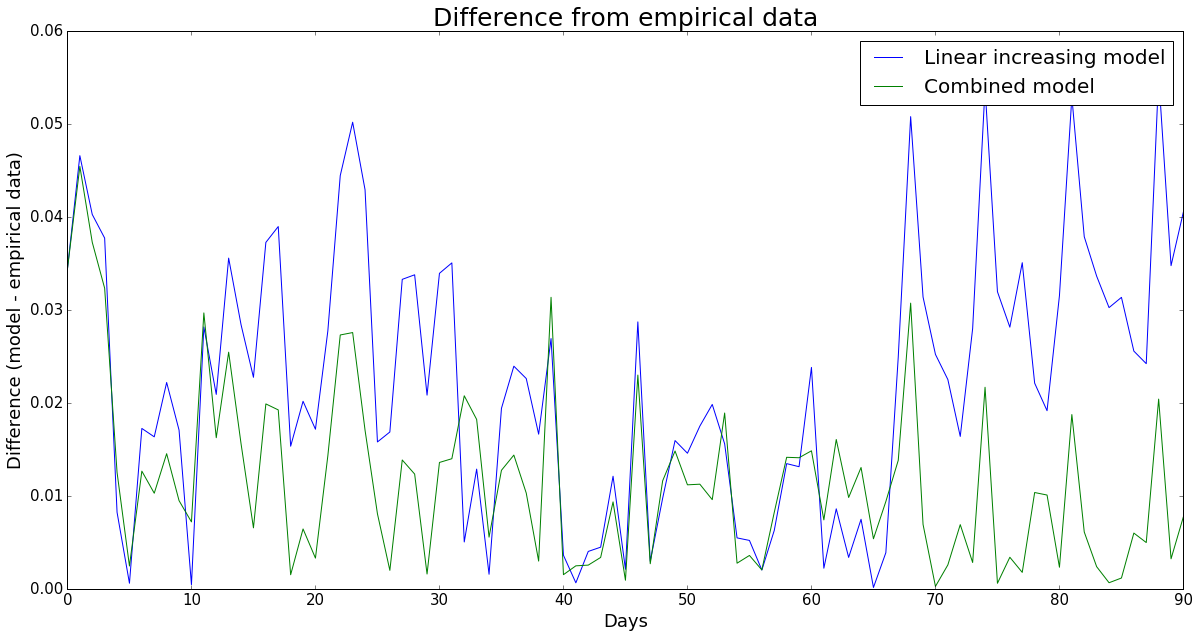

In [109]:
plt.figure(figsize=(20,10))
ax = abs((linearDF - empirical_data[~pd.isnull(modelDF)]).mean(axis=1)).plot(label='Linear increasing model')
ax.set_title('Difference from empirical data', fontsize=25)
abs((mergedDF - empirical_data[~pd.isnull(modelDF)]).mean(axis=1)).plot(ax=ax, label='Combined model')

#abs(abs((linearDF - empirical_data[~pd.isnull(modelDF)]).mean(axis=1)) - abs((mergedDF - empirical_data[~pd.isnull(modelDF)]).mean(axis=1))).plot()

#abs(((linearDF - empirical_data[~pd.isnull(modelDF)]) - (mergedDF - empirical_data[~pd.isnull(modelDF)]))).mean(axis=1).plot(ax=ax, label='diff')
#(modelDF - empirical_data[~pd.isnull(modelDF)]).mean(axis=1).plot(ax=ax, label='model')
ax.set_xlabel('Days', fontsize=18)
ax.set_ylabel('Difference (model - empirical data)', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20)
plt.savefig('./imgs/diff_models.png')

In [110]:
slid_empirical = pd.rolling_mean(empirical_data, 5)

/home/eric/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5,center=False).mean()
  if __name__ == '__main__':


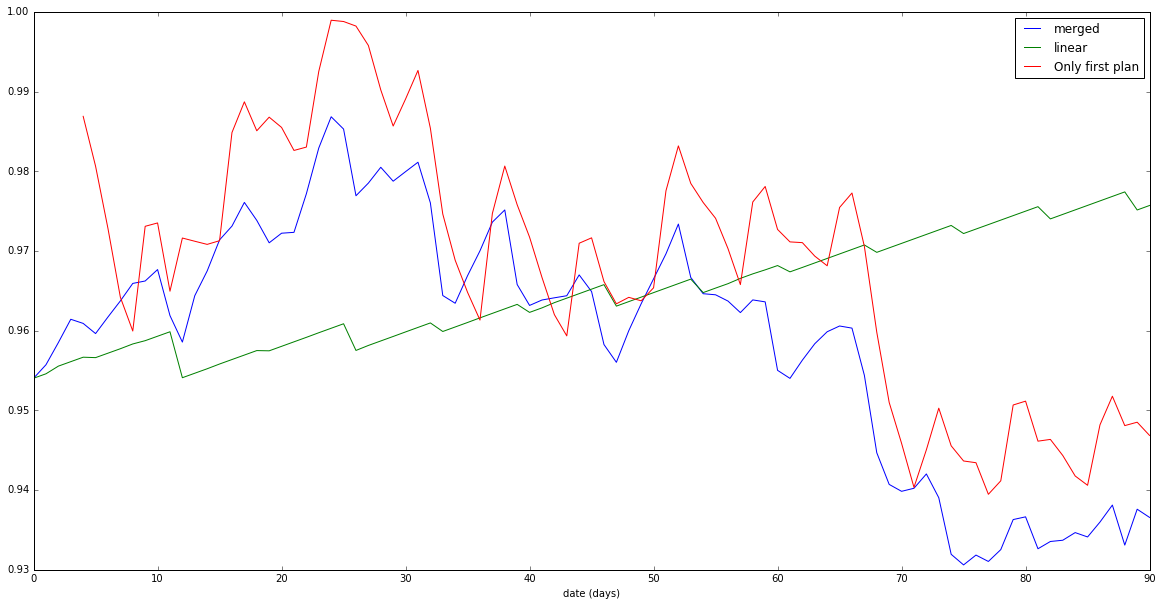

In [111]:
plt.figure(figsize=(20,10))
ax = mergedDF.mean(axis=1).plot(label='merged')
#empirical_data.mean(axis=1).plot(ax=ax, label='empirical')
linearDF.mean(axis=1).plot(ax=ax, label='linear')
#modelDF.mean(axis=1).plot(ax=ax, label='model')
slid_empirical[~pd.isnull(modelDF)].mean(axis=1).plot(ax=ax, label='Only first plan')
plt.legend()

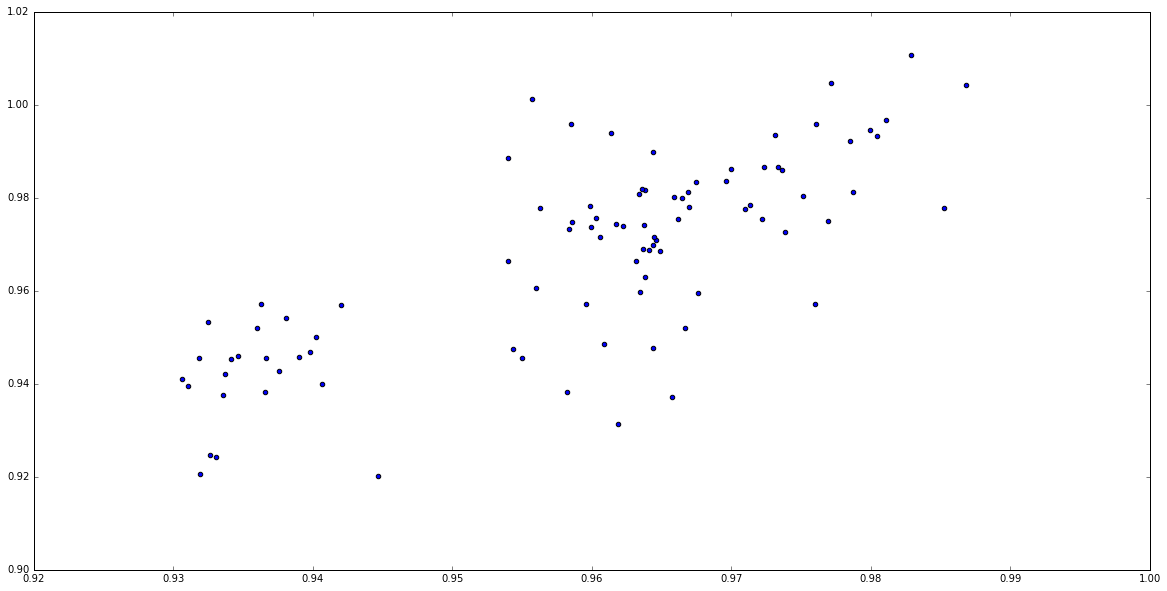

In [112]:
plt.figure(figsize=(20,10))
plt.scatter(x=mergedDF.mean(axis=1), y=empirical_data[~pd.isnull(modelDF)].mean(axis=1))


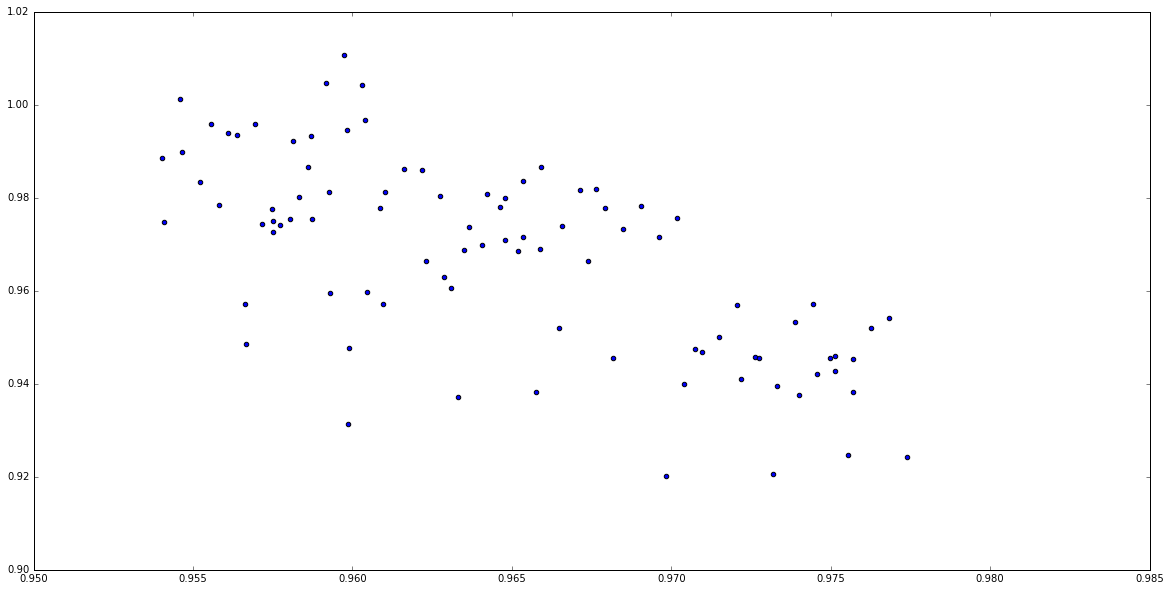

In [113]:
plt.figure(figsize=(20,10))
plt.scatter(x=linearDF.mean(axis=1), y=empirical_data[~pd.isnull(modelDF)].mean(axis=1))

In [138]:
empirical_data.head()

id              3         7         9         79        89        109    \
date (days)                                                               
0            1.203208  1.192181  0.930984  0.994790  1.127574  0.928909   
1            1.090551  0.751980  0.994376  1.018184  1.133042  0.990605   
2            1.368851  1.079537  0.928962  0.967552  0.911602  0.990948   
3            0.648808  1.096612  1.079067  0.916548  0.875834  1.175122   
4            0.904348  1.108548  1.048549  1.056979  0.760025  0.983047   

id              139       151       197       261    ...    68757  68763  \
date (days)                                          ...                   
0                 NaN  0.986278  0.948130  0.903792  ...      NaN    NaN   
1                 NaN  1.001616  0.860333  1.250526  ...      NaN    NaN   
2            0.618836  0.982734  0.942178  1.051717  ...      NaN    NaN   
3            1.129907  1.166013  1.101099  0.951532  ...      NaN    NaN   
4            0.766694  0.915340  0.928185  0.973382  ...      NaN    NaN   

id           68817  68827  68845  68849  68869  68873  68877  68881  
date (days)                                                          
0              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
1              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
2              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
3              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
4              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  

[5 rows x 1939 columns]

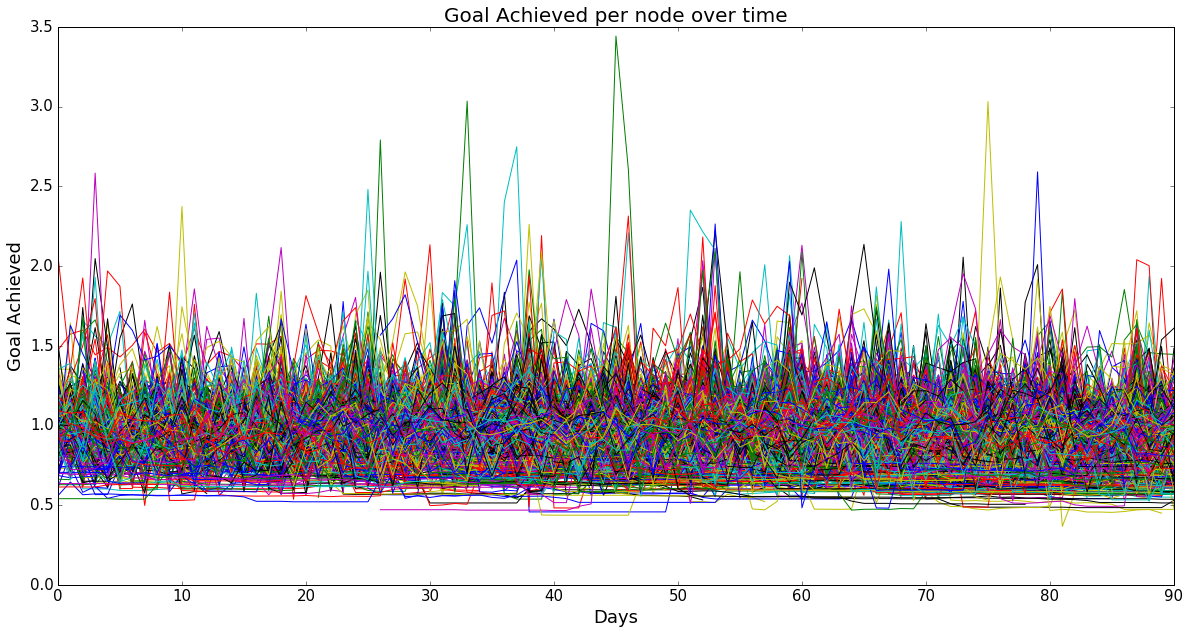

In [114]:
plt.figure(figsize=(20,10))

plt.xlabel('Days', fontsize=18)
plt.ylabel('Goal Achieved', fontsize=18)
plt.title('Goal Achieved per node over time', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(fontsize=20)
plt.plot(empirical_data.values)
plt.savefig('./imgs/empirical_data.png')

In [136]:
abs(mergedDF.mean(axis=1) - empirical_data[~pd.isnull(modelDF)].mean(axis=1)).mean()

0.013213374919333686

In [139]:
abs(mergedDF.mean(axis=1) - empirical_data[~pd.isnull(modelDF)].mean(axis=1)).std()

0.008547836485533783

In [140]:
abs(linearDF.mean(axis=1) - empirical_data[~pd.isnull(modelDF)].mean(axis=1)).mean()

0.02212489286742036

In [141]:
abs(linearDF.mean(axis=1) - empirical_data[~pd.isnull(modelDF)].mean(axis=1)).std()

0.013775923775897394

In [117]:
stats.mannwhitneyu(abs(mergedDF.mean(axis=1) - slid_empirical[~pd.isnull(modelDF)].mean(axis=1)), 
                  abs(linearDF.mean(axis=1) - slid_empirical[~pd.isnull(modelDF)].mean(axis=1)))

MannwhitneyuResult(statistic=2790.0, pvalue=7.2670902004223626e-05)

In [118]:
stats.mannwhitneyu(abs(mergedDF.mean(axis=1) - empirical_data[~pd.isnull(modelDF)].mean(axis=1)), 
                  abs(linearDF.mean(axis=1) - empirical_data[~pd.isnull(modelDF)].mean(axis=1)))

MannwhitneyuResult(statistic=2472.5, pvalue=1.3504694016688902e-06)

In [119]:
stats.wilcoxon(abs(mergedDF.mean(axis=1) - slid_empirical[~pd.isnull(modelDF)].mean(axis=1)), 
                  abs(linearDF.mean(axis=1) - slid_empirical[~pd.isnull(modelDF)].mean(axis=1)))

WilcoxonResult(statistic=638.0, pvalue=8.4737535624363465e-09)

In [120]:
stats.wilcoxon(abs(mergedDF.mean(axis=1) - empirical_data[~pd.isnull(modelDF)].mean(axis=1)), 
                  abs(linearDF.mean(axis=1) - empirical_data[~pd.isnull(modelDF)].mean(axis=1)))

WilcoxonResult(statistic=700.0, pvalue=5.8962060182260739e-08)

In [135]:
stats.kendalltau(mergedDF.mean(axis=1), empirical_data[~pd.isnull(modelDF)].mean(axis=1))

KendalltauResult(correlation=0.53894993894993914, pvalue=3.8440311701070789e-14)

In [122]:
stats.kendalltau(linearDF.mean(axis=1), empirical_data[~pd.isnull(modelDF)].mean(axis=1))

KendalltauResult(correlation=-0.46227106227106246, pvalue=8.6011900832743822e-11)

In [123]:
stats.kendalltau(mergedDF.mean(axis=1), linearDF.mean(axis=1))

KendalltauResult(correlation=-0.48864468864468885, pvalue=6.8887508589535897e-12)

In [181]:
stats.linregress(x=range(91), y=mergedDF.mean(axis=1))

LinregressResult(slope=-0.00042727655804453228, intercept=0.97825338404668349, rvalue=-0.73887990066028908, pvalue=6.2367301187270492e-17, stderr=4.1304289429440683e-05)

In [177]:
empirical_data[~pd.isnull(modelDF)]

id              3         7         9         79        89        109    \
date (days)                                                               
0            1.203208  1.192181  0.930984  0.994790  1.127574  0.928909   
1            1.090551  0.751980  0.994376  1.018184  1.133042  0.990605   
2            1.368851  1.079537  0.928962  0.967552  0.911602  0.990948   
3            0.648808  1.096612  1.079067  0.916548  0.875834  1.175122   
4            0.904348  1.108548  1.048549  1.056979  0.760025  0.983047   
5            1.010895       NaN  0.994730  1.008688  1.086981  0.967816   
6            0.970621       NaN  1.116104  1.053402  1.111477  1.098519   
7            1.056405       NaN  1.056598  1.092157  0.853638  0.981669   
8            1.066811       NaN  1.062795  1.413561  1.077370  0.978333   
9            0.906739       NaN  1.077677  1.117293  1.132603  1.024103   
10           0.988977       NaN  1.002744  1.131382  0.814159  1.036916   
11           1.119510       NaN  1.145367  1.131928  0.822490  0.877874   
12                NaN       NaN  0.964930  1.001052       NaN  0.871557   
13                NaN       NaN  1.175420  1.006081       NaN  0.887832   
14                NaN       NaN  0.896561  1.317509       NaN  1.051643   
15                NaN       NaN  1.025367  1.061147       NaN  1.083097   
16                NaN       NaN  1.052136  0.963339       NaN  0.919825   
17                NaN       NaN  1.149123  0.932971       NaN  0.970775   
18                NaN       NaN  1.216253  1.046713       NaN  0.907499   
19                NaN       NaN       NaN  0.988895       NaN  0.909226   
20                NaN       NaN       NaN  1.075547       NaN  0.989741   
21                NaN       NaN       NaN  1.063732       NaN  1.050838   
22                NaN       NaN       NaN  1.108200       NaN  0.980058   
23                NaN       NaN       NaN  1.084743       NaN  1.146294   
24                NaN       NaN       NaN  1.018448       NaN  0.987608   
25                NaN       NaN       NaN  1.004027       NaN  1.089163   
26                NaN       NaN       NaN  1.019214       NaN  0.899710   
27                NaN       NaN       NaN  1.127020       NaN  0.903806   
28                NaN       NaN       NaN  1.156249       NaN  0.956148   
29                NaN       NaN       NaN  1.084964       NaN  0.923053   
...               ...       ...       ...       ...       ...       ...   
61                NaN       NaN       NaN       NaN       NaN  1.051774   
62                NaN       NaN       NaN       NaN       NaN  0.924620   
63                NaN       NaN       NaN       NaN       NaN  0.932726   
64                NaN       NaN       NaN       NaN       NaN  0.979486   
65                NaN       NaN       NaN       NaN       NaN  0.886341   
66                NaN       NaN       NaN       NaN       NaN  1.133145   
67                NaN       NaN       NaN       NaN       NaN  0.904058   
68                NaN       NaN       NaN       NaN       NaN       NaN   
69                NaN       NaN       NaN       NaN       NaN       NaN   
70                NaN       NaN       NaN       NaN       NaN       NaN   
71                NaN       NaN       NaN       NaN       NaN       NaN   
72                NaN       NaN       NaN       NaN       NaN       NaN   
73                NaN       NaN       NaN       NaN       NaN       NaN   
74                NaN       NaN       NaN       NaN       NaN       NaN   
75                NaN       NaN       NaN       NaN       NaN       NaN   
76                NaN       NaN       NaN       NaN       NaN       NaN   
77                NaN       NaN       NaN       NaN       NaN       NaN   
78                NaN       NaN       NaN       NaN       NaN       NaN   
79                NaN       NaN       NaN       NaN       NaN       NaN   
80                NaN       NaN       NaN       NaN       NaN       NaN   
81                NaN    